# TASK 4
# Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.

Dataset :- https://www.kaggle.com/gti-upm/leapgestrecog

**In this project i  used 00 directory from dataset**

In [ ]:
!pip install mediapipe


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


drive.mount('/content/drive')

base_folder_path = '/content/extracted_data/00'

subfolders = [
    '01_palm',
    '02_l',
    '03_fist',
    '04_fist_moved',
    '05_thumb',
    '06_index',
    '07_ok',
    '08_palm_moved',
    '09_c',
    '10_down'
]

def load_images_from_folders(base_path, subfolders):
    images = []
    labels = []
    for label, subfolder in enumerate(subfolders):
        folder_path = os.path.join(base_path, subfolder)
        if not os.path.exists(folder_path):
            print(f"Directory not found: {folder_path}")
            continue
        for filename in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                images.append(cv2.resize(img, (128, 128)))
                labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folders(base_folder_path, subfolders)
images = images / 255.0
labels = to_categorical(labels)  # One-hot encode labels


X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(subfolders), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.5768 - loss: 1.3330 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9916 - loss: 0.0317 - val_accuracy: 0.9975 - val_loss: 0.0052
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9912 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 6.1627e-04
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9975 - val_loss: 0.0057
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9966 - loss: 0.0159 - val_accuracy: 0.9975 - val_loss: 0.0025
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9947 - loss: 0.0168 - val_accuracy: 0.9975 - val_loss: 0.0085
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9964 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 5.3684e-05
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.

In [ ]:


loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


model.save('/content/gesture_recognition_model.keras')

print("Model saved in Keras format (.h5)")
model = load_model('/content/gesture_recognition_model.keras')
# Create a dictionary mapping class indices to class names
class_names = {i: subfolder for i, subfolder in enumerate(subfolders)}
print("Class mapping:")
for idx, name in class_names.items():
    print(f"Class {idx}: {name}")

if len(X_val) > 0:
    sample_image = X_val[0:1]  # Get the first validation image
    prediction = model.predict(sample_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    print(f"Sample prediction: {class_names[predicted_class]} (Class {predicted_class})")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 3.8216e-05
Validation Accuracy: 100.00%
Model saved in Keras format (.h5)
Class mapping:
Class 0: 01_palm
Class 1: 02_l
Class 2: 03_fist
Class 3: 04_fist_moved
Class 4: 05_thumb
Class 5: 06_index
Class 6: 07_ok
Class 7: 08_palm_moved
Class 8: 09_c
Class 9: 10_down
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
Sample prediction: 10_down (Class 9)


Upload an image for gesture recognition:


Saving frame_00_08_0200.png to frame_00_08_0200.png

Processing image: frame_00_08_0200.png


Predicted Class: 08_palm_moved
Confidence: 100.00%


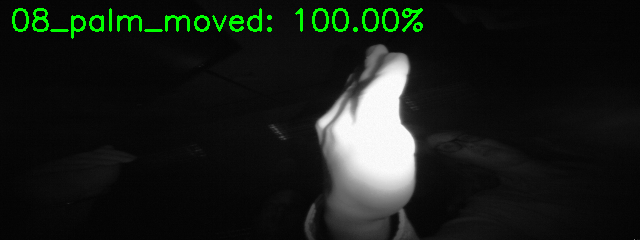

In [ ]:
from google.colab import files
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/gesture_recognition_model.keras')

def process_uploaded_image(image_path):
    # Read and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        print("Error loading image")
        return

    # Resize image
    resized_img = cv2.resize(img, (128, 128))
    # Normalize pixel values
    normalized_img = resized_img / 255.0
    # Expand dimensions
    input_img = np.expand_dims(normalized_img, axis=0)

    prediction = model.predict(input_img, verbose=0)
    predicted_class_idx = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class_idx] * 100


    print(f"Predicted Class: {class_names[predicted_class_idx]}")
    print(f"Confidence: {confidence:.2f}%")

    display_img = img.copy()
    text = f"{class_names[predicted_class_idx]}: {confidence:.2f}%"
    cv2.putText(display_img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(display_img)  # For Colab

print("Upload an image for gesture recognition:")
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"\nProcessing image: {filename}")
    process_uploaded_image(filename)